# Manual Data Labelling

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time

import matplotlib.pyplot as plt

import math
import json
import getpass
from IPython.display import display, clear_output

#import ML liberaries
import cv2
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
# Get the data from CSV file
data = pd.read_csv('collected_training_data.csv')

In [33]:
len(data)

1923

## Setup to label images quickly

In [24]:
def labeling_dataset(data = data, label_txt = ['Stop', 'SlowForward', 'SoftLeft', 'SoftRight'], START_FRAME = 200, END_FRAME = 300 ):
    no_of_frames = END_FRAME - START_FRAME

    dataset = data
    # create a new column in data
    dataset['labels'] = None
    dataset['label txt'] = None

    # iterate through data to create histograms
    for i in range(START_FRAME,END_FRAME ):
        # get the image by location (as json format)
        img_as_json = dataset['img'][i]

        # convert the json to nested list
        img_as_list = json.loads(img_as_json)
        # convert the nested list to np.array
        img = np.array(img_as_list)
        
        # show the image
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.title(f"{i} , {dataset['motion'][i]}")
        plt.show()
        #display(plt.gcf())
        plt.close()

        # Capture manual label assoociated with image
        valid_entries = {'0', '1', '2' , '3'}  # Define the valid directions

        while True:
            label = getpass.getpass("Add driving direction:")  
            if label in valid_entries:
                break  # Break the loop if the input is valid
            else:
                print("Invalid direction....")

        # label = getpass.getpass("Add driving direction:")
        dataset.at[i, 'labels'] = int(label)
        dataset.at[i, 'label txt'] = label_txt[int(label)]

        # Clear the previous output to show the next image
        if i != END_FRAME - 1:
            clear_output(wait=True)
    
    dataset = dataset[['img' , 'labels' , 'label txt']]
    dataset = dataset[dataset['labels'].notnull()]
    
    return dataset

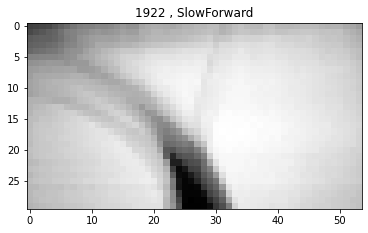

In [35]:
labelled_images_2 = labeling_dataset(data = data, 
                 label_txt = ['Stop', 'SlowForward', 'SoftLeft', 'SoftRight'],
                 START_FRAME = 0, 
                 END_FRAME = 1923 )

In [36]:
labelled_images_2.to_csv('labelled_images_2.csv', index=False)